# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Leo Prangs Tobing
- **Email:** leoprangs@gmail.com 
- **ID Dicoding:** leo_prangs_tobing

## Submission Info

### Kriteria
1. ✅ [diambil opsi pertama] Menggunakan Salah Satu dari Dataset yang Telah Disediakan
2. ✅ [Ada 3 pertanyaan] Melakukan Seluruh Proses Analisis Data dari pertanyaan dan visualisasi (minimal 2 buah pertanyaan & 2 buah visualisasi) sampai kesimpulan.
3. ✅ [Sesuai notebook ini] Proses Analisis Dibuat dalam Notebook yang Rapi
4. ✅ [Running di local dan cloud] Membuat Dashboard Sederhana Menggunakan Streamlit, pastikan jalan di local.

### ketentuan Berkas
Dataset yang digunakan dalam proses analisis data.
- ✅ Berkas Jupyter Notebook atau Colab Notebook (.ipynb). Pastikan berkas notebook tersebut sudah dijalankan.
- ✅ Berkas Python (.py) yang digunakan untuk membuat dashboard dengan streamlit.
- ✅ Berkas requirements.txt yang berisi berbagai library yang digunakan dalam proses analisis data. 
- ✅ Berkas Markdown (README.md) yang berisi cara menjalankan dashboard (contoh: dicoding collection dashboard).

### Penilaian for Star ✨
1. ✅ Memberikan dokumentasi menggunakan markdown/text cell pada notebook (.ipynb) untuk menjelaskan setiap tahapan analisis data. 
2. ✅ Membuat visualisasi data yang baik dan efektif dengan menerapkan prinsip desain dan integritas.
3. ✅ Deploy dashboard ke dalam streamlit cloud.
4. Menerapkan teknik analisis lanjutan seperti RFM analysis, geospatial analysis, clustering, dll. (Tanpa menggunakan algoritma machine learning).
<br>**Catatan**: Pastikan teknik analisis lanjutan yang dilakukan relevan dengan dataset yang digunakan.
- [❌ walau recency dan frequency bisa diakali, tapi tidak ada kolom yang mewakili monetary] **RFM Analysis**, bertujuan mengelompokkan pelanggan berdasarkan perilaku pembelian mereka dengan memperhatikan tiga faktor utama:
  - Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
  - Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
  - Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut.
  - Anda dapat melihat contoh implementasi kodenya pada submodul Latihan Membuat Visualisasi Data.
- [❌ tidak ada data lokasi] **Geospatial Analysis**, bertujuan menganalisis data berdasarkan lokasi geografis untuk mengidentifikasi tren atau pola tertentu di suatu wilayah. Anda bisa menggunakan package seperti GeoPandas atau folium untuk membuat peta yang menampilkan distribusi data berdasarkan lokasi.

- [✅ Terdapat data waktu, variable terikat(casual, registered, cnt), dan variable bebas(weather,temp,hum,windspeed)] **Clustering**, bertujuan mengelompokkan data ke dalam grup berdasarkan karakteristik tertentu tanpa menggunakan algoritma machine learning. Berikut adalah beberapa metode clustering yang bisa diterapkan:
  - Manual Grouping: Menentukan kriteria pengelompokan berdasarkan aturan bisnis atau pemahaman domain, seperti mengelompokkan pelanggan berdasarkan rentang usia, pendapatan, atau jumlah transaksi.
  - Binning: Menggunakan teknik binning untuk membagi data ke dalam interval atau kategori tertentu.

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh suhu (temp) dan kelembaban (hum) terhadap jumlah pengguna sepeda (cnt) di Washington D.C.?
> Pertanyaan ini ingin menjawab apakah ada hubungan antara suhu dan kelembaban dengan jumlah pengguna sepeda di Washington D.C. Dengan menganalisis data, kita dapat mengetahui apakah suhu dan kelembaban yang tinggi atau rendah berpengaruh terhadap jumlah pengguna sepeda.
2. Apa perbedaan jumlah pengguna sepeda antara pengguna casual dan pengguna registered di Washington D.C. pada hari libur dan hari kerja?
> Pertanyaan ini ingin menjawab apakah ada perbedaan jumlah pengguna sepeda antara pengguna casual dan pengguna registered di Washington D.C. pada hari libur dan hari kerja. Dengan menganalisis data, kita dapat mengetahui apakah pengguna casual atau pengguna registered lebih banyak

## Import Semua Packages/Library yang Digunakan

In [376]:

# Pilihan project: Pandas, Matplotlib, Seaborn & Streamlit (khusus untuk file py)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # konversi angka untuk kasus pertanyaan 2
import seaborn as sns

pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Mencegah pemotongan tampilan di terminal

## Data Wrangling

### Gathering Data

In [377]:
# Buka file dan simpan dalam variabel
df_day = pd.read_csv('data/day.csv')
df_hour = pd.read_csv('data/hour.csv')

# untuk melihat apakah format data sama, kita ambil 3 baris pertama
df_day.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [378]:
df_hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


**Insight:**
- `dtday` dan `hr` digunakan untuk group rata-rata nilai dari `temp`, `atemp`, `hum` & `windspeed`.
- Berdasarkan Readme.txt, terdapat normalisasi untuk keseragaman data
  - Suhu (temp) dinormalisasi dengan cara dibagi 41, yang berarti nilai aslinya adalah temp * 41 dalam derajat Celsius.
  - Suhu terasa (atemp) dinormalisasi dengan cara dibagi 50, jadi nilai aslinya adalah atemp * 50 dalam derajat Celsius.
  - Kelembaban (hum) dinormalisasi dengan cara dibagi 100, jadi nilai aslinya adalah hum * 100 dalam persen (%).
  - Kecepatan angin (windspeed) dinormalisasi dengan cara dibagi 67, jadi nilai aslinya adalah windspeed * 67 dalam satuan tertentu.
- dataframe `day.csv` mengandung agregasi `hour.csv` pada beberapa data berikut:
  - `temp`,	`atemp`,	`hum`,	`windspeed` dikelompokkan berdasarkan nilai rata-rata per hari. 
  - `weathersit` dikelompokkan berdasarkan nilai modus per hari.
  - `casual`,	`registered`,	`cnt` dikelompokkan berdasarkan jumlah total per hari.

Untuk memastikan apakah kolom weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt dalam df_day adalah agregrasi harian dari df_hour, kita bisa melakukan perbandingan dengan cara berikut:

In [379]:
# Pastikan dteday dalam format datetime
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])
df_day["dteday"] = pd.to_datetime(df_day["dteday"])

# Hitung rata-rata harian untuk temp, atemp, hum, windspeed
df_hour_avg = df_hour.groupby("dteday")[["temp", "atemp", "hum", "windspeed"]].mean().reset_index()

# Hitung modus harian untuk weathersit
df_hour_mode = df_hour.groupby("dteday")["weathersit"].apply(lambda x: x.mode()[0]).reset_index()

# Hitung total harian untuk casual, registered, cnt
df_hour_sum = df_hour.groupby("dteday")[["casual", "registered", "cnt"]].sum().reset_index()

# Gabungkan semua hasil agregasi
df_hour_daily = df_hour_avg.merge(df_hour_mode, on="dteday").merge(df_hour_sum, on="dteday")

# Gabungkan dengan df_day untuk perbandingan
df_comparison = df_day.merge(df_hour_daily, on="dteday", suffixes=("_day", "_hour_agg"))

# Hitung selisih antara nilai di df_day dan hasil agregasi dari df_hour
df_comparison["temp_diff"] = df_comparison["temp_day"] - df_comparison["temp_hour_agg"]
df_comparison["atemp_diff"] = df_comparison["atemp_day"] - df_comparison["atemp_hour_agg"]
df_comparison["hum_diff"] = df_comparison["hum_day"] - df_comparison["hum_hour_agg"]
df_comparison["windspeed_diff"] = df_comparison["windspeed_day"] - df_comparison["windspeed_hour_agg"]
df_comparison["weathersit_diff"] = df_comparison["weathersit_day"] - df_comparison["weathersit_hour_agg"]
df_comparison["casual_diff"] = df_comparison["casual_day"] - df_comparison["casual_hour_agg"]
df_comparison["registered_diff"] = df_comparison["registered_day"] - df_comparison["registered_hour_agg"]
df_comparison["cnt_diff"] = df_comparison["cnt_day"] - df_comparison["cnt_hour_agg"]

# Periksa apakah semua selisih mendekati nol
print(df_comparison[["temp_diff", "atemp_diff", "hum_diff", "windspeed_diff", 
                      "weathersit_diff", "casual_diff", "registered_diff", "cnt_diff"]].describe())


          temp_diff    atemp_diff      hum_diff  windspeed_diff  weathersit_diff  casual_diff  registered_diff  cnt_diff
count  7.310000e+02  7.310000e+02  7.310000e+02    7.310000e+02       731.000000        731.0            731.0     731.0
mean   1.779739e-11  1.000772e-08 -2.622606e-09   -1.443825e-08         0.097127          0.0              0.0       0.0
std    2.736837e-07  2.931941e-07  2.751549e-07    2.694124e-07         0.355204          0.0              0.0       0.0
min   -4.782609e-07 -5.000000e-07 -5.217391e-07   -5.000000e-07        -1.000000          0.0              0.0       0.0
25%   -3.333333e-07 -1.666667e-07 -3.333333e-07   -1.666667e-07         0.000000          0.0              0.0       0.0
50%    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00         0.000000          0.0              0.0       0.0
75%    3.333333e-07  2.608696e-07  3.333333e-07    1.666667e-07         0.000000          0.0              0.0       0.0
max    4.782609e-07  5.000000e-0

**Insight:**
- Kolom temp, atemp, hum, dan windspeed
  - Mean (≈ 0) → Nilai rata-rata selisih sangat kecil (~10⁻⁷ atau lebih kecil), mendekati nol.
  - Std Dev (≈ 10⁻⁷) → Variasi sangat kecil, menunjukkan bahwa nilai dari df_day hampir selalu sesuai dengan rata-rata harian dari df_hour.
  - Min & Max (≈ ±5×10⁻⁷) → Rentang perbedaan sangat kecil, kemungkinan hanya karena presisi perhitungan atau pembulatan angka.
  - Kesimpulan → temp, atemp, hum, dan windspeed di df_day memang benar hasil rata-rata dari df_hour. ✅
- Kolom weathersit
  - Mean (≈ 0.097) → Ada sedikit perbedaan rata-rata antara df_day dan df_hour.
  - Std Dev (≈ 0.35) → Cukup besar dibandingkan kolom lainnya, menunjukkan bahwa ada beberapa hari di mana nilai weathersit di df_day tidak sama dengan modus harian dari df_hour.
  - Min (-1.0) & Max (1.0) → Ada hari di mana nilai weathersit di df_day lebih tinggi atau lebih rendah dari nilai modus harian df_hour hingga 1 unit.
  - Kesimpulan →
    - Sebagian besar hari nilai weathersit sesuai dengan modus df_hour, tetapi ada beberapa perbedaan kecil.
    - Ini bisa terjadi karena metode agregasi weathersit di df_day mungkin menggunakan metode selain modus (mode).
    - Bisa dicek lebih lanjut apakah ada hari-hari di mana tidak ada nilai weathersit yang dominan dalam df_hour.
- Kolom casual, registered, dan cnt
  - Mean (= 0) & Std Dev (= 0) → Semua nilai selisih adalah 0.
  - Min & Max (= 0) → Tidak ada perbedaan sama sekali antara df_day dan hasil agregasi df_hour.
  - Kesimpulan → casual, registered, dan cnt di df_day adalah benar hasil penjumlahan dari df_hour. ✅

In [380]:
print(df_hour.info()) # Tampilkan informasi tentang data kita gunakan df_hour karena lebih lengkap

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:** 
<br>Ada beberapa pola kelompok data:
 - **Waktu** (dteday, season, yr, mnth, holiday, weekday, workingday)
    - **Waktu Terikat** (yr + mnth = dteday) [📊mungkin perlu dicek]
    - **Waktu Boolean** (holiday & workingday)
    - **Waktu Nominal** (yr, season, mnth, weekday)
 - **Diskrit** (casual, registered, & cnt)
 - **Ordinal** (weathersit)
 - **kontinue** (temp, atemp, hum, & windspeed)

### Merging Data

- Apakah kedua dataset perlu digabungkan? tergantung:
  - Jika skala-nya day-level cukup pakai df_day.
  - Jika skala-nya hour-level pakai df_hour. 
  - Jika mencari nilai rata-rata (temp or hum) per hari, data bisa digabungkan berdasarkan hari. 
- df_day memiliki 731 record, jika di pecah mejadi 24 jam, maka seharusnya ada 731*24 = 17.544 record. Tapi hanya ada 17.379 record di df_hour

#### Periksa Rentang Waktu

Lihat range waktu dteday tiap dataset df_day dan df_hour ini akan menjadi acuan jika ada tanggal hilang

In [381]:
print(df_day[['dteday']].min())
print(df_day[['dteday']].max())
print("\n",df_hour[['dteday','hr']].min())
print(df_hour[['dteday','hr']].max())
# Range 2011-01-01 00:00:00 -> 2012-12-31 23:00:00

dteday   2011-01-01
dtype: datetime64[ns]
dteday   2012-12-31
dtype: datetime64[ns]

 dteday    2011-01-01 00:00:00
hr                          0
dtype: object
dteday    2012-12-31 00:00:00
hr                         23
dtype: object


Untuk mengecek apakah ada tanggal (dteday) yang hilang dalam rentang "2011-01-01" sampai "2012-12-31" di df_day, kita bisa melakukan perbandingan dengan rentang tanggal yang seharusnya ada.

In [382]:
# Pastikan dteday dalam format datetime
df_day["dteday"] = pd.to_datetime(df_day["dteday"])

# Buat rentang tanggal dari 2011-01-01 sampai 2012-12-31
expected_dates = pd.date_range(start="2011-01-01", end="2012-12-31", freq="D")

# Cari tanggal yang hilang
missing_dates = set(expected_dates) - set(df_day["dteday"])

# Cek hasil
print(f"Jumlah tanggal yang hilang: {len(missing_dates)}")
print("Tanggal yang hilang:", sorted(missing_dates))

Jumlah tanggal yang hilang: 0
Tanggal yang hilang: []


In [383]:
# Cek apakah ada dteday yang duplikat pada df_day.dteday
duplicates = df_day["dteday"].value_counts()
duplicates = duplicates[duplicates > 1]
print(duplicates)

Series([], Name: count, dtype: int64)


In [384]:
## Periksa detail terkait rentang waktu yang hilang pada df_hour.dteday terhadap df_hour.timestamp
# Buat rentang waktu yang seharusnya ada
date_range = pd.date_range(start="2011-01-01", end="2013-01-01", freq="h")  # Rentang per jam (dari Timestamp('2012-12-31 00:00:00') sampai Timestamp('2013-01-01 00:00:00'))
date_range = date_range[:-1] # Hilangkan 1 data di ujung (jadi dapat 731*24 = 17.544 record)
expected_hours = len(date_range)

# Cek jumlah seharusnya vs jumlah yang ada
print(f"Seharusnya ada {expected_hours} jam, tetapi ada {len(df_hour)} jam dalam dataset.")

# Pastikan dteday bertipe datetime
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

# Periksa apakah ada timestamp yang hilang
df_hour["timestamp"] = df_hour["dteday"] + pd.to_timedelta(df_hour["hr"], unit="h")
missing_timestamps = set(date_range) - set(df_hour["timestamp"])

print(f"Jumlah timestamp yang hilang: {len(missing_timestamps)}")
missing_timestamps

Seharusnya ada 17544 jam, tetapi ada 17379 jam dalam dataset.
Jumlah timestamp yang hilang: 165


{Timestamp('2011-01-02 05:00:00'),
 Timestamp('2011-01-03 02:00:00'),
 Timestamp('2011-01-03 03:00:00'),
 Timestamp('2011-01-04 03:00:00'),
 Timestamp('2011-01-05 03:00:00'),
 Timestamp('2011-01-06 03:00:00'),
 Timestamp('2011-01-07 03:00:00'),
 Timestamp('2011-01-11 03:00:00'),
 Timestamp('2011-01-11 04:00:00'),
 Timestamp('2011-01-12 03:00:00'),
 Timestamp('2011-01-12 04:00:00'),
 Timestamp('2011-01-14 04:00:00'),
 Timestamp('2011-01-18 00:00:00'),
 Timestamp('2011-01-18 01:00:00'),
 Timestamp('2011-01-18 02:00:00'),
 Timestamp('2011-01-18 03:00:00'),
 Timestamp('2011-01-18 04:00:00'),
 Timestamp('2011-01-18 05:00:00'),
 Timestamp('2011-01-18 06:00:00'),
 Timestamp('2011-01-18 07:00:00'),
 Timestamp('2011-01-18 08:00:00'),
 Timestamp('2011-01-18 09:00:00'),
 Timestamp('2011-01-18 10:00:00'),
 Timestamp('2011-01-18 11:00:00'),
 Timestamp('2011-01-19 03:00:00'),
 Timestamp('2011-01-22 05:00:00'),
 Timestamp('2011-01-23 04:00:00'),
 Timestamp('2011-01-24 02:00:00'),
 Timestamp('2011-01-

#### Buat DF Baru

In [385]:
# Periksa row yang null
full_df = pd.DataFrame({"timestamp": date_range})

# Gabungkan dengan data asli
df_filled = full_df.merge(df_hour, on="timestamp", how="left")

## --- HAPUS KOLOM YANG TIDAK DIBUTUHKAN ---
df_filled.drop(columns=["instant", "season", "mnth", "holiday", "weekday"], inplace=True)

print(df_filled.isnull().sum())  # Cek jumlah missing values

timestamp       0
dteday        165
yr            165
hr            165
workingday    165
weathersit    165
temp          165
atemp         165
hum           165
windspeed     165
casual        165
registered    165
cnt           165
dtype: int64


In [386]:
# periksa tipe
print(df_filled.info(
    verbose=True 
))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   17544 non-null  datetime64[ns]
 1   dteday      17379 non-null  datetime64[ns]
 2   yr          17379 non-null  float64       
 3   hr          17379 non-null  float64       
 4   workingday  17379 non-null  float64       
 5   weathersit  17379 non-null  float64       
 6   temp        17379 non-null  float64       
 7   atemp       17379 non-null  float64       
 8   hum         17379 non-null  float64       
 9   windspeed   17379 non-null  float64       
 10  casual      17379 non-null  float64       
 11  registered  17379 non-null  float64       
 12  cnt         17379 non-null  float64       
dtypes: datetime64[ns](2), float64(11)
memory usage: 1.7 MB
None


In [387]:
# periksa tipe
print(df_day.info(
    verbose=True 
))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Memasukkan data kosong dan memperbaiki Tipe Data

In [388]:
# Fungsi untuk menghitung modus tanpa stats.mode
def mode_without_stats(series):
    return series.value_counts().idxmax() if not series.isnull().all() else None

# Hitung agregasi
day_agg = df_hour.groupby("dteday").agg({
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "weathersit": mode_without_stats,  # Hitung modus tanpa stats
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
    "workingday": "mean",
    "yr": "mean"
}).reset_index()

# Pastikan dteday dalam df_filled bertipe datetime
df_filled["dteday"] = df_filled["timestamp"].dt.date  # Ambil hanya tanggal
df_filled["dteday"] = pd.to_datetime(df_filled["dteday"])  # Konversi ke datetime

# Gabungkan data
df_filled = df_filled.merge(day_agg, on="dteday", how="left", suffixes=('', '_day'))

fill_columns = ["temp", "atemp", "hum", "windspeed", "weathersit", "casual", "registered", "cnt", "workingday", "yr"]

for col in fill_columns:
    df_filled[col] = df_filled[col].fillna(df_filled[f"{col}_day"])

# Hapus kolom tambahan
df_filled.drop(columns=[f"{col}_day" for col in fill_columns], inplace=True)

# Isi dteday berdasarkan di df_day
df_filled["dteday"] = df_filled["timestamp"].dt.date

# Ubah df_filled["dteday"] menjadi datetime64[ns]
df_filled["dteday"] = pd.to_datetime(df_filled["dteday"])

# Isi nilai hr berdasarkan timestamp
df_filled["hr"] = df_filled["timestamp"].dt.hour

# ubah format yr, workingday, weathersit, casual, registered, cnt jadi int
df_filled["yr"] = pd.to_numeric(df_filled["yr"], errors="coerce").fillna(0).astype("int32")
df_filled["workingday"] = pd.to_numeric(df_filled["workingday"], errors="coerce").fillna(0).astype("int32")
df_filled["weathersit"] = pd.to_numeric(df_filled["weathersit"], errors="coerce").fillna(0).astype("int32")
df_filled["casual"] = pd.to_numeric(df_filled["casual"], errors="coerce").fillna(0).astype("int64")
df_filled["registered"] = pd.to_numeric(df_filled["registered"], errors="coerce").fillna(0).astype("int64")
df_filled["cnt"] = pd.to_numeric(df_filled["cnt"], errors="coerce").fillna(0).astype("int64")

### ---- UBAH FORMAT KOLOM ------ ###
# 2   yr          17379 non-null  float64       
#  3   hr          17379 non-null  float64       
#  4   workingday  17379 non-null  float64       
#  5   weathersit  17379 non-null  float64       
#  6   temp        17379 non-null  float64       
#  7   atemp       17379 non-null  float64       
#  8   hum         17379 non-null  float64       
#  9   windspeed   17379 non-null  float64       
#  10  casual      17379 non-null  float64       
#  11  registered  17379 non-null  float64       
#  12  cnt         17379 non-null  float64  



In [389]:
print(df_filled.isnull().sum())  # Cek jumlah missing values, harusnya semua nol (0)
print("\n",len(df_filled)) # Target 17.544 = 24 * 731 (len(df_day) dari "2011-01-01" sampai "2012-12-31")

timestamp     0
dteday        0
yr            0
hr            0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 17544


In [390]:
df_filled.head(3)

,timestamp,dteday,yr,hr,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01 00:00:00,2011-01-01,0,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01 01:00:00,2011-01-01,0,1,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01 02:00:00,2011-01-01,0,2,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [391]:
# periksa tipe final (float hanya untuk temp, atemp, hum, & windspeed)
print(df_filled.info(
    verbose=True 
))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   17544 non-null  datetime64[ns]
 1   dteday      17544 non-null  datetime64[ns]
 2   yr          17544 non-null  int32         
 3   hr          17544 non-null  int32         
 4   workingday  17544 non-null  int32         
 5   weathersit  17544 non-null  int32         
 6   temp        17544 non-null  float64       
 7   atemp       17544 non-null  float64       
 8   hum         17544 non-null  float64       
 9   windspeed   17544 non-null  float64       
 10  casual      17544 non-null  int64         
 11  registered  17544 non-null  int64         
 12  cnt         17544 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int32(4), int64(3)
memory usage: 1.5 MB
None


#### Ekspor df_filled Keluar
Karena data sudah di cleaning, kita akan menggunakannya untuk dashboard.py

In [ ]:
## --- HAPUS KOLOM YANG TIDAK DIBUTUHKAN DI DASHBOARD ---
df_filled.drop(columns=["timestamp"], inplace=True)

# df_filled.to_csv("dashboard/main_data.csv", index=False) # dimatikan karena diperlukan hanya ketika ingin ekspor

### Assessing Data

Masalah yang diperiksa:
- Missing Value: Apa ada kolom data yang kosong?
- Invalid value: Apa ada data yang tidak masuk akal atau diluar ketentuan?
- Duplicate Data: Apa ada data yang sama atau berulang?
- Inacurate Value: Apa ada data yang tidak sesuai hasil observasi?
- Inconsistent Value: Apa ada perbedaan standar tiap nilai?
- Outlier: Apa ada data yang berlebihan?

Menggunakan Data dari Hari Sebelumnya
Jika pola penggunaan sepeda cenderung berulang setiap hari, kita bisa mengisi data yang hilang dengan nilai dari hari sebelumnya:

In [393]:
# Gabungkan data berdasarkan 'dteday'
merged_df = pd.merge(df_hour, df_day.drop(columns=["cnt", "casual", "registered"]), on="dteday", how="left")
merged_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,hum_x,windspeed_x,casual,registered,cnt,timestamp,instant_y,season_y,yr_y,mnth_y,holiday_y,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446


#### Missing Value (Data Kosong)

In [394]:
print(df_hour.isnull().sum())
print("### -------------------------------")
print(df_day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
timestamp     0
dtype: int64
### -------------------------------
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### Invalid Value (Data Tidak Masuk Akal)

In [395]:
print("### DF Hour ---")
print("Season: ", df_hour['season'].unique())  # Seharusnya hanya ada 1, 2, 3, 4
print("Weather: ", df_hour['weathersit'].unique())  # Seharusnya hanya ada 1, 2, 3, 4
print("Temperature: ", df_hour[df_hour['temp'] < 0])  # Temperatur tidak boleh negatif
print("Humidity: ", df_hour[df_hour['hum'] > 1])  # Humidity harus antara 0 dan 1
print("\n### DF Day ---")
print("Season", df_day['season'].unique())  # Seharusnya hanya ada 1, 2, 3, 4
print("Weather: ", df_day['weathersit'].unique())  # Seharusnya hanya ada 1, 2, 3, 4
print("Temperature: ", df_day[df_day['temp'] < 0])  # Temperatur tidak boleh negatif
print("Humidity: ", df_day[df_day['hum'] > 1])  # Humidity harus antara 0 dan 1

### DF Hour ---
Season:  [1 2 3 4]
Weather:  [1 2 3 4]
Temperature:  Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt, timestamp]
Index: []
Humidity:  Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt, timestamp]
Index: []

### DF Day ---
Season [1 2 3 4]
Weather:  [2 1 3]
Temperature:  Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Humidity:  Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


#### Duplicate Data (Data Berulang)

In [396]:
print("DF Hour: ", df_hour.duplicated().sum())
print("DF Day: ", df_day.duplicated().sum())

DF Hour:  0
DF Day:  0


#### Inaccurate Value (Data Tidak Sesuai Observasi)

In [397]:
print("### DF Hour ---")
print("Angin 0 m/s: ", df_hour[df_hour['windspeed'] == 0])  # Seharusnya jarang terjadi angin 0 m/s sepanjang waktu
print("\nCnt lebih kecil dari casual + registered: ", df_hour[df_hour['cnt'] < (df_hour['casual'] + df_hour['registered'])])  # Cek apakah cnt lebih kecil dari casual + registered
print("\n\n### DF Day ---")
print("Angin 0 m/s: ", df_day[df_day['windspeed'] == 0])  # Seharusnya jarang terjadi angin 0 m/s sepanjang waktu
print("\nCnt lebih kecil dari casual + registered: ", df_day[df_day['cnt'] < (df_day['casual'] + df_day['registered'])])  # Cek apakah cnt lebih kecil dari casual + registered

### DF Hour ---
Angin 0 m/s:         instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt           timestamp
0            1 2011-01-01       1   0     1   0        0        6           0           1  0.24  0.2879  0.81        0.0       3          13   16 2011-01-01 00:00:00
1            2 2011-01-01       1   0     1   1        0        6           0           1  0.22  0.2727  0.80        0.0       8          32   40 2011-01-01 01:00:00
2            3 2011-01-01       1   0     1   2        0        6           0           1  0.22  0.2727  0.80        0.0       5          27   32 2011-01-01 02:00:00
3            4 2011-01-01       1   0     1   3        0        6           0           1  0.24  0.2879  0.75        0.0       3          10   13 2011-01-01 03:00:00
4            5 2011-01-01       1   0     1   4        0        6           0           1  0.24  0.2879  0.75        0.0       0           1

In [398]:
# Inconsistent Value (Perbedaan Standar)
df_hour.describe()  # Cek distribusi data apakah ada perbedaan skala yang aneh

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,timestamp
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2012-01-02 15:41:22.858622464
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011-01-01 00:00:00
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011-07-04 22:30:00
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012-01-02 21:00:00
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012-07-02 06:30:00
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012-12-31 23:00:00
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,NaN


In [399]:
df_day.describe()  # Cek distribusi data apakah ada perbedaan skala yang aneh

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Outlier (Data Berlebihan)

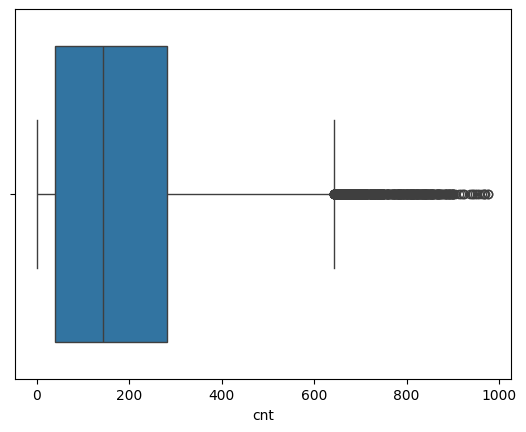

In [400]:
sns.boxplot(x=df_hour['cnt'])
plt.show()

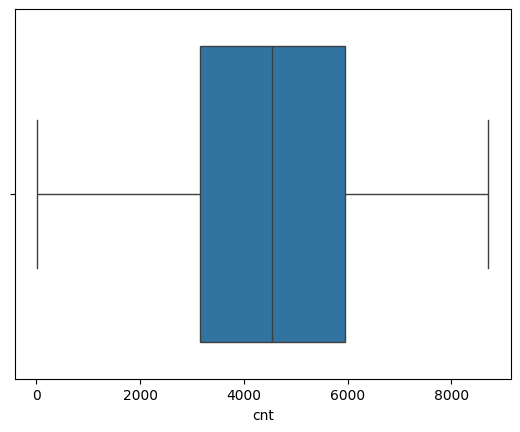

In [401]:
sns.boxplot(x=df_day['cnt'])
plt.show()

In [402]:
# Hitung Q1 (Kuartil 1) dan Q3 (Kuartil 3)
Q1 = df_hour['cnt'].quantile(0.25)
Q3 = df_hour['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outlier
outliers = df_hour[(df_hour['cnt'] < lower_bound) | (df_hour['cnt'] > upper_bound)]

# Tampilkan outlier
print(outliers[['cnt']].head())
print("panjang data: ", len(outliers))

       cnt
5536   651
10358  644
10359  712
10382  676
10383  734
panjang data:  505


**Insight**
- ✅ Tidak ada Missing Value
- ✅ Tidak ada Invalid Value, `df_day` tidak punya weather = 4 (karena yang diambil nilai rata-rata harian)
- ✅ Inacutare Value: Ada 2180 rows dari `df_hour` yang punya windspeed 0 (normal karena angin tidak akan terus bertiup tiap jam) 
- ✅ 505 Outlier di `df_hour.cnt` karena jumlah pengguna sepeda pasti akan berfluktuasi tiap jam nya (karena ada waktu istirahat dan cuaca). 
- Untuk pengujian sisanya, sepertinya data sudah dirapikan sejak awal.

### Cleaning Data

Karena tidak ada kerusakan pada dataset hour dan day, jadi tidak ada pembersihan. Untuk filter kolom dilakukan di bagian Visualisasi (agar prosesnya mudah dikelompokkan). Cleaning untuk merging dilakukan di bagian **Merging Data**

## Exploratory Data Analysis (EDA)

Mengakses Beberapa insigh melalui proses yang menghasilkan Pivot Table. Beberapa manipulasi dilakukan langsung pada bagian Visualisasi.

In [403]:
# Hitung total jumlah pengguna sepeda berdasarkan tahun
yearly_summary = df_hour.groupby('yr')[['casual', 'registered', 'cnt']].sum()

# Ubah index menjadi label deskriptif
yearly_summary.index = ['2011', '2012']

# Hitung persentase perubahan dari tahun sebelumnya
yearly_summary_pct = yearly_summary.pct_change() * 100

# Gabungkan data utama dengan persentase perubahan
yearly_summary_combined = yearly_summary.astype(object)  # Konversi ke object agar bisa menampung string
yearly_summary_combined.loc['% Change'] = yearly_summary_pct.iloc[1].apply(lambda x: f"{x:.2f}%" if pd.notna(x) else '-')

# Format angka dengan pemisah ribuan
yearly_summary_combined.iloc[:-1] = yearly_summary_combined.iloc[:-1].map(lambda x: f"{int(x):,}")

# Tampilkan hasil
print(yearly_summary_combined)

           casual registered        cnt
2011      247,252    995,851  1,243,103
2012      372,765  1,676,811  2,049,576
% Change   50.76%     68.38%     64.88%


**Insight:** Penggunaan sepeda meningkat drastis di 2012, terutama oleh pengguna registered, yang menunjukkan semakin banyak orang berlangganan dan menggunakan sepeda secara rutin. 🚴‍♂️

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana pengaruh suhu (temp) dan kelembaban (hum) terhadap jumlah pengguna sepeda (cnt)?

In [404]:
# Ambil kolom yang diperlukan dan buat salinan
df1 = df_filled[['temp', 'hum', 'cnt']].copy()

# Konversi ke nilai asli
df1['temp'] = df1['temp'] * 41  # Temperatur dalam skala asli (Celcius)
df1['hum'] = df1['hum'] * 100   # Kelembaban dalam skala asli (%)

# Tampilkan hasil
df1.head(3)

,temp,hum,cnt
0,9.84,81.0,16
1,9.02,80.0,40
2,9.02,80.0,32


In [405]:
# tampilkan rentang suhu
print(f"Rentang suhu: {df1['temp'].min()} - {df1['temp'].max()}")

Rentang suhu: 0.8200000000000001 - 41.0


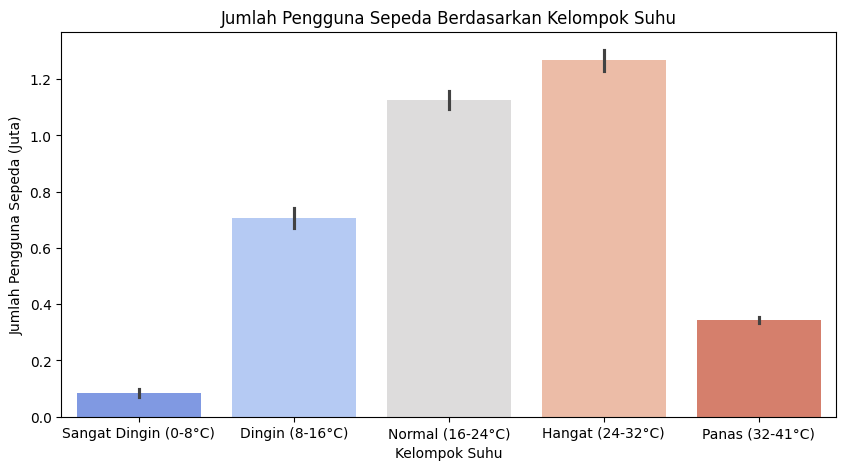

In [406]:
# Manual Grouping atau Binning untuk suhu terhadap jumlah pengguna sepeda

# Definisikan rentang suhu dalam derajat Celsius
temp_bins = [0, 8.2, 16.4, 24.6, 32.8, 41]  # Sesuai dengan 0-1 skala yang dikalikan 41
temp_labels = ['Sangat Dingin (0-8°C)', 'Dingin (8-16°C)', 'Normal (16-24°C)', 'Hangat (24-32°C)', 'Panas (32-41°C)']
df1['temp_group'] = pd.cut(df1['temp'], bins=temp_bins, labels=temp_labels)

# Visualisasi rata-rata jumlah pengguna berdasarkan suhu
plt.figure(figsize=(10, 5))
sns.barplot(x='temp_group', y=df1['cnt'] / 1_000_000, data=df1, estimator=sum, hue='temp_group', palette='coolwarm')
plt.title('Jumlah Pengguna Sepeda Berdasarkan Kelompok Suhu')
plt.xlabel('Kelompok Suhu')
plt.ylabel('Jumlah Pengguna Sepeda (Juta)')
plt.show()

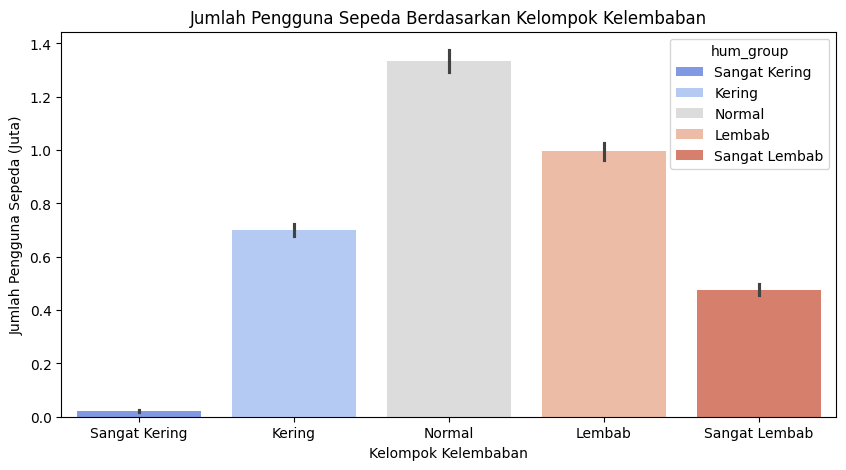

In [407]:
# Manual Grouping atau Binning untuk kelembaban
hum_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
hum_labels = ['Sangat Kering', 'Kering', 'Normal', 'Lembab', 'Sangat Lembab']
df_filled['hum_group'] = pd.cut(df_filled['hum'], bins=hum_bins, labels=hum_labels)

# Visualisasi rata-rata jumlah pengguna berdasarkan kelembaban
plt.figure(figsize=(10, 5))
sns.barplot(x='hum_group', y=df_filled['cnt'] / 1_000_000, data=df_filled, estimator=sum, hue='hum_group', palette='coolwarm')
plt.title('Jumlah Pengguna Sepeda Berdasarkan Kelompok Kelembaban')
plt.xlabel('Kelompok Kelembaban')
plt.ylabel('Jumlah Pengguna Sepeda (Juta)')
plt.show()

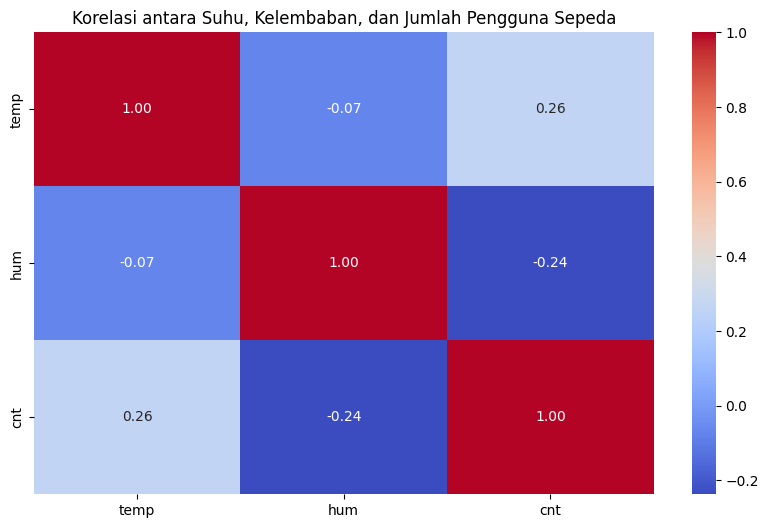

In [408]:
# Heatmap Korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df1[['temp', 'hum', 'cnt']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Suhu, Kelembaban, dan Jumlah Pengguna Sepeda')
plt.show()

### Pertanyaan 2: Apa perbedaan jumlah pengguna sepeda antara pengguna casual dan pengguna registered pada hari libur dan hari kerja?

In [409]:
df2 = df_filled[['casual', 'registered', 'workingday']].copy()
print(df2[['casual', 'registered']].describe())

             casual    registered
count  17544.000000  17544.000000
mean      37.212437    163.763680
std       61.185760    208.215253
min        0.000000      0.000000
25%        4.000000     34.000000
50%       17.000000    117.000000
75%       49.000000    223.000000
max     1658.000000   5080.000000


In [410]:
# Tampilkan dalam format tabel

# Hitung total pengguna casual dan registered berdasarkan hari kerja vs hari libur
grouped_data = df2.groupby('workingday')[['casual', 'registered']].sum()

# Ubah index menjadi label
grouped_data.index = ['Hari Libur', 'Hari Kerja']

# Ubah ke format dalam satuan juta
grouped_data = grouped_data / 1e6

# Tambahkan total pengguna
grouped_data['Total Pengguna'] = grouped_data['casual'] + grouped_data['registered']

# Ubah format agar lebih mudah dibaca
grouped_data = grouped_data.round(2)  # Bulatkan ke 2 desimal

# Tampilkan tabel
print("Jumlah Pengguna Sepeda (juta)")
print(grouped_data)

Jumlah Pengguna Sepeda (juta)
            casual  registered  Total Pengguna
Hari Libur    0.34        0.73            1.07
Hari Kerja    0.32        2.14            2.46


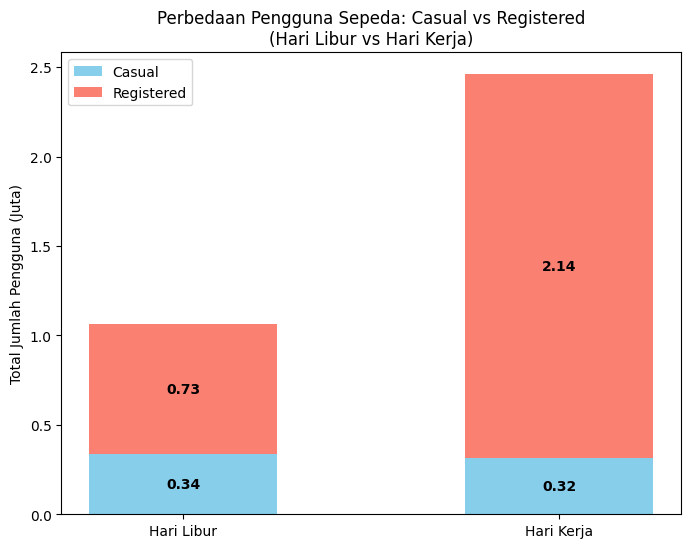

In [411]:
# Hitung total pengguna casual dan registered berdasarkan hari kerja vs hari libur
grouped_data = df2.groupby('workingday')[['casual', 'registered']].sum()

# Ubah index menjadi label
grouped_data.index = ['Hari Libur', 'Hari Kerja']

# Buat bar chart
plt.figure(figsize=(8, 6))
x = np.arange(len(grouped_data))
width = 0.5  # Lebar batang

# Plot Casual
bars1 = plt.bar(x, grouped_data['casual'] / 1e6, color='skyblue', label='Casual', width=width)

# Plot Registered di atas Casual
bars2 = plt.bar(x, grouped_data['registered'] / 1e6, color='salmon', 
                bottom=grouped_data['casual'] / 1e6, label='Registered', width=width)

# Tambahkan label pada setiap bar
for bar, casual, registered in zip(bars1, grouped_data['casual'], grouped_data['registered']):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             casual / 1e6 / 2,  # Posisi di tengah bar casual
             f'{casual / 1e6:.2f}', 
             ha='center', va='center', fontsize=10, color='black', fontweight='bold')

for bar, casual, registered in zip(bars2, grouped_data['casual'], grouped_data['registered']):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             (casual + registered) / 1e6 - (registered / 1e6 / 2),  # Posisi di tengah bar registered
             f'{registered / 1e6:.2f}', 
             ha='center', va='center', fontsize=10, color='black', fontweight='bold')

# Tambahkan label dan judul
plt.xticks(x, grouped_data.index)
plt.ylabel('Total Jumlah Pengguna (Juta)')
plt.title('Perbedaan Pengguna Sepeda: Casual vs Registered\n(Hari Libur vs Hari Kerja)', fontsize=12)
plt.legend()

# Format sumbu y agar menampilkan angka dalam juta
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}'))

# Tampilkan plot
plt.show()

### (Opsional) Pertanyaan 3: Bagaimana Pola Penggunaan Sepeda dalam Sehari, terutama berdasarkan pengaruh cuaca?

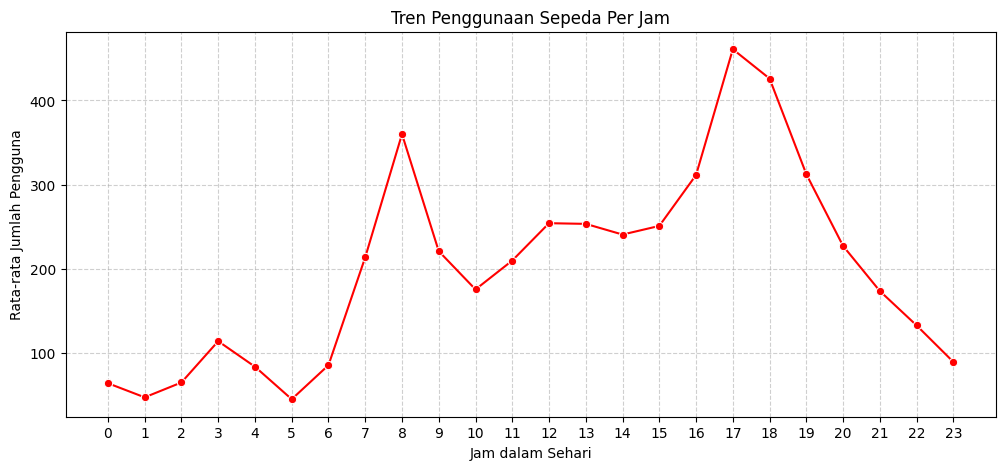

In [412]:
# Hitung rata-rata jumlah pengguna per jam
hourly_trend = df_filled.groupby('hr')['cnt'].mean().reset_index()

# Visualisasi tren per jam
plt.figure(figsize=(12, 5))
sns.lineplot(x='hr', y='cnt', data=hourly_trend, marker='o', color='r')

plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.title('Tren Penggunaan Sepeda Per Jam')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

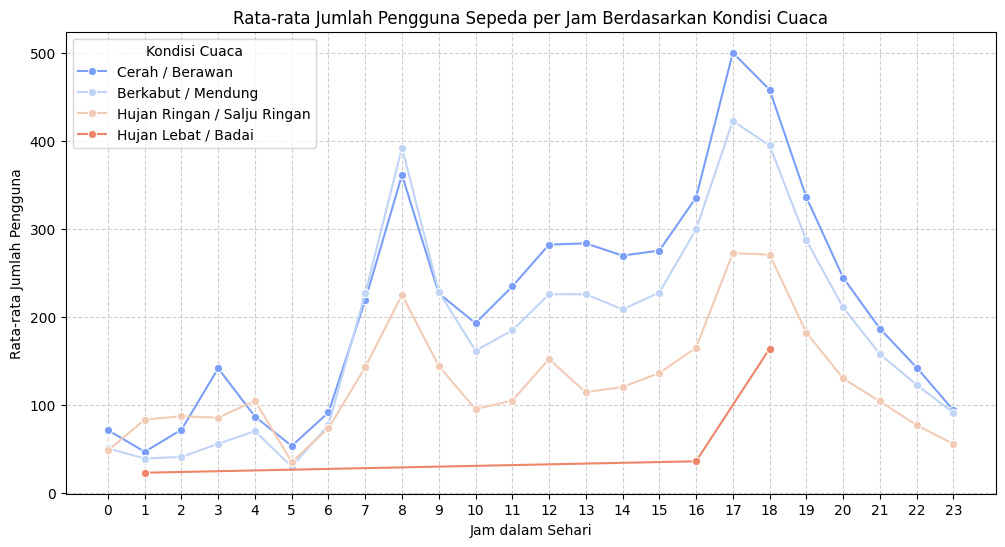

In [413]:
# Kelompokkan berdasarkan jam dan kondisi cuaca, lalu hitung rata-rata jumlah pengguna sepeda
hourly_weather = df_filled.groupby(['hr', 'weathersit'])['cnt'].mean().reset_index()

# Mapping kondisi cuaca ke label deskriptif
weather_labels = {
    1: "Cerah / Berawan",
    2: "Berkabut / Mendung",
    3: "Hujan Ringan / Salju Ringan",
    4: "Hujan Lebat / Badai"
}
hourly_weather['weathersit'] = hourly_weather['weathersit'].map(weather_labels)

# Plot garis untuk menunjukkan pola per jam berdasarkan cuaca
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='weathersit', data=hourly_weather, marker='o', palette='coolwarm')

# Tambahkan label dan judul
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.title('Rata-rata Jumlah Pengguna Sepeda per Jam Berdasarkan Kondisi Cuaca')
plt.xticks(range(0, 24))  # Set jam dari 0 sampai 23
plt.legend(title='Kondisi Cuaca')
plt.grid(True, linestyle='--', alpha=0.6)

# Tampilkan plot
plt.show()

## Conclusion

- Conclution pertanyaan 1
    - Pengguna sepeda memilih suhu yang hangat (24-32°C) dan temperatur yang normal (0,4 - 0,6) untuk bersepeda.
    - Suhu memiliki hubungan lebih kuat dengan jumlah pengguna dibandingkan kelembaban (0.26%).
    - Kelembaban hampir tidak memengaruhi jumlah pengguna sepeda (-0.24%).
    - Namum, persentase menunjukkan tingkat pengaruh suhu dan kelembaban sangat kecil terhadap jumlah pengguna sepeda. 
- Conclution pertanyaan 2
    - Sebagian besar pengguna sepeda di Washington D.C. adalah pengguna registered, terutama di hari kerja.
    - Pada hari libur, pengguna casual lebih banyak dibandingkan hari kerja secara proporsional, kemungkinan untuk rekreasi.
    - Sepeda lebih sering digunakan sebagai moda transportasi utama di hari kerja, bukan sekadar aktivitas santai.
    - Jadi, jika ingin mengoptimalkan layanan sepeda, bisa dipertimbangkan:
        - Meningkatkan layanan di hari kerja untuk registered users.
        - Meningkatkan fasilitas rekreasi di hari libur untuk casual users.
- Conclution pertanyaan 3
    - Puncak pengguna terjadi saat jam kerja dan pulang kerja, menunjukkan bahwa sepeda adalah alternatif transportasi utama bagi banyak orang.
    - Cuaca sangat berpengaruh: Saat cuaca buruk, jumlah pengguna menurun, sehingga penyedia layanan sewa sepeda atau kebijakan transportasi harus mempertimbangkan cuaca dalam strategi operasional mereka.
    - Peningkatan infrastruktur seperti jalur sepeda yang lebih aman dan tempat berteduh dapat membantu meningkatkan penggunaan sepeda bahkan saat cuaca kurang mendukung.